In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from itertools import product
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d


In [4]:
data0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/Overlap2022_11_29_10_11_34_L15_1',delimiter=',')
z0 = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/z_2022_11_29_10_11_34_L15_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zz_2022_11_29_10_11_34_L15_1',delimiter=',')

#data_g =np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_28/AFM_Energy_L1_15_den0.000_delta0.5_1.5_omega0.600_ramptime1.000_dt0.050_No0.csv',delimiter=',')
z0_g = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zg_2022_11_29_10_11_34_L15_1',delimiter=',')
zz0_g=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/11_29/zzg_2022_11_29_10_11_34_L15_1',delimiter=',')


In [5]:
t = data0[0]
crit_id0 = np.argmin(abs(t-4))
crit_id0
print(data0[1][crit_id0])

1.2324123900096442


Crit Time 3.9888us
Crit Detuning 1.2324MHz
Correlatorof the evolved state[ 0.51924  0.148    0.043    0.01464 -0.00221 -0.00953 -0.00484]
Correlator of the ground state[0.5275158200789642, 0.16020241208380548, 0.05127160672251995, 0.018545370939655727, 0.0066937003486895914, 0.002273736334354473, 0.0005985605628924806]


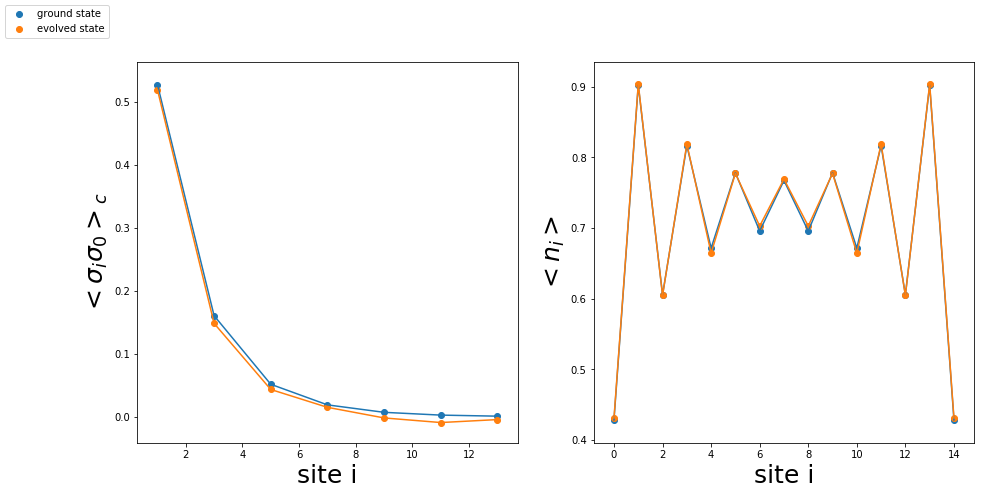

In [6]:
N = 15
center_id = int(N/2)
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
sign = np.ones(N-1)
sign[0::2]=-1
z_g = z0_g[crit_id0]
zz_g = zz0_g[crit_id0].reshape(N,N)
n_g = (1-z_g)/2
sigma_g = (n_g[0:N-1]-n_g[1:N])*sign
nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
sigma2 = []
sigma2_g = []
sigma_c_g = []
x2 = np.arange(0,N-2,2)
for i in x2:
    temp_g = ( (-1)**i * (nn_g[center_id-int(i/2),center_id+int(i/2)]\
                               +nn_g[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn_g[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn_g[center_id-int(i/2),center_id+int(i/2)+1]))
    
    sigma2_g.append(temp_g)
    sigma_c_g.append(temp_g-sigma_g[center_id-int(i/2)]*sigma_g[center_id+int(i/2)])
ax[0].scatter(x2+1,sigma_c_g,label='ground state')
ax[0].plot(x2+1,sigma_c_g)
ax[1].scatter(np.arange(0,N),n_g)
ax[1].plot(np.arange(0,N),n_g)

for t_id in range(crit_id0,crit_id0+1,1):

    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    sigma = (n[0:N-1]-n[1:N])*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    x = np.arange(1,N)
    sigma_c = []
    

    for i in x2:
        temp = ( (-1)**i * (nn[center_id-int(i/2),center_id+int(i/2)]\
                               +nn[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn[center_id-int(i/2),center_id+int(i/2)+1]))
        sigma2.append(temp)
        sigma_c.append(temp-sigma[center_id-int(i/2)]*sigma[center_id+int(i/2)])
    ax[0].scatter(x2+1,sigma_c,label='evolved state')
    ax[0].plot(x2+1,sigma_c)
    ax[0].set_xlabel('site i',fontsize = 25)
    ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
    ax[1].scatter(np.arange(0,N),n)
    ax[1].plot(np.arange(0,N),n)
    ax[1].set_xlabel('site i',fontsize = 25)
    ax[1].set_ylabel('$<n_i>$',fontsize = 25)
#ax[0].set_yscale('log')
fig.legend(loc ='upper left')
print('Crit Time '+str(np.round(t[t_id],4))+'us')
print('Crit Detuning '+str(np.round(data0[1][t_id],4))+'MHz')
print('Correlatorof the evolved state'+ str(np.round(sigma_c,5)))
print('Correlator of the ground state'+ str(sigma_c_g))

In [137]:
tempcorrelator15 =  np.array([0.5275158200789642, 0.16020241208380548, 0.05127160672251995, 0.018545370939655727, 0.0066937003486895914, 0.002273736334354473, 0.0005985605628924806])
tempcorrelator19 = np.array([0.529317561497303, 0.162583867414539, 0.05305242922289672, 0.019876013692561836, 0.007763262797399105, 0.003057425282026672, 0.0011586023627724214, 0.00040520867304012775, 0.00010889900010480069])

[5.29317561e-01 1.62583867e-01 5.30524292e-02 1.98760137e-02
 7.76326280e-03 3.05742528e-03 1.15860236e-03 4.05208673e-04
 1.08899000e-04]
[0.52751582 0.16020241 0.05127161 0.01854537 0.0066937  0.00227374
 0.00059856]


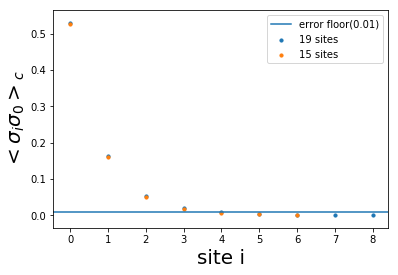

In [164]:
x1 = np.arange(0,len(tempcorrelator15))
x2 = np.arange(0,len(tempcorrelator19))
MS = 10
plt.scatter(x2,tempcorrelator19,label = '19 sites',s=MS)
plt.scatter(x1,tempcorrelator15,label = '15 sites',s=MS)
plt.axhline(0.01,label='error floor(0.01)' )
plt.xlabel('site i',fontsize = 20)
plt.ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 20)
plt.legend()
print(tempcorrelator19)
print(tempcorrelator15)

Crit Time 3.9888us
Crit Detuning 1.2324MHz
Correlatorof the evolved state[ 0.1053   0.03002  0.00872  0.00297 -0.00045 -0.00193 -0.00098]
Correlator of the ground state[0.5275158200789642, 0.16020241208380548, 0.05127160672251995, 0.018545370939655727, 0.0066937003486895914, 0.002273736334354473, 0.0005985605628924806]


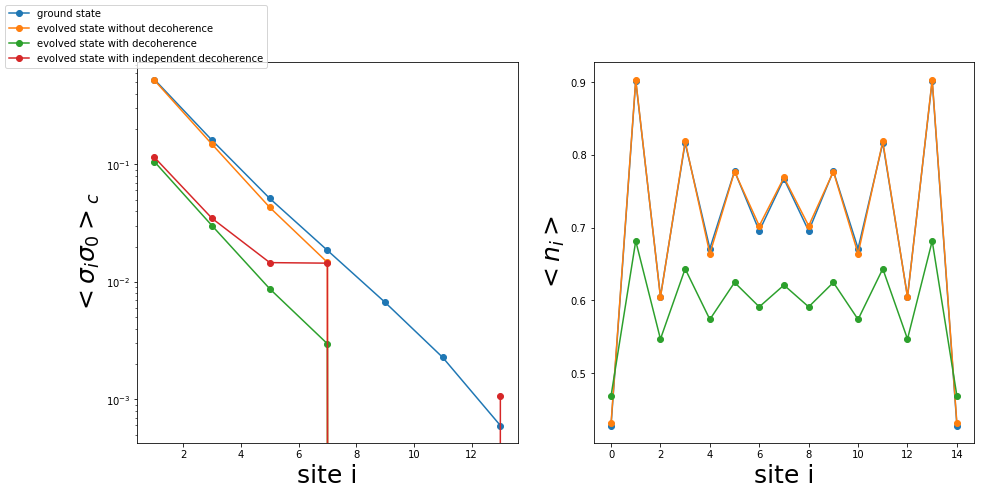

In [7]:
N = 15
center_id = int(N/2)
fig,ax = plt.subplots(ncols=2,nrows=1,figsize=(15,7))
sign = np.ones(N-1)
sign[0::2]=-1
z_g = z0_g[crit_id0]
zz_g = zz0_g[crit_id0].reshape(N,N)
n_g = (1-z_g)/2
sigma_g = (n_g[0:N-1]-n_g[1:N])*sign
nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4

sigma2_g = []
sigma_c_g = []
x2 = np.arange(0,N-2,2)
for i in x2:
    temp_g = ( (-1)**i * (nn_g[center_id-int(i/2),center_id+int(i/2)]\
                               +nn_g[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn_g[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn_g[center_id-int(i/2),center_id+int(i/2)+1]))
    
    sigma2_g.append(temp_g)
    sigma_c_g.append(temp_g-sigma_g[center_id-int(i/2)]*sigma_g[center_id+int(i/2)])
ax[0].plot(x2+1,sigma_c_g,'-ok',color='#1f77b4',label='ground state')
ax[1].plot(np.arange(0,N),n_g,'-ok',color='#1f77b4')
#coherence time 
t0 = 5
t0_site = np.array([16.735735735735737, 10.105105105105105, 10.24924924924925, 9.288288288288289, 6.573573573573573, 3.714714714714715, 5.396396396396397, 5.396396396396397, 5.18018018018018, 6.045045045045045, 8.735735735735735, 10.105105105105105, 9.816816816816816, 10.777777777777779, 19.28228228228228])
for t_id in range(crit_id0,crit_id0+1,1):
    ti = t[t_id]
    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n0 = (1-z)/2
    nn0 = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    sigma0 = (n0[0:N-1]-n0[1:N])*sign

    dec_z = np.exp(-ti/t0)*z
    dec_zz = np.exp(-2*ti/t0)*zz
    n = (1-dec_z)/2
    nn = (np.ones((N,N))-dec_z-dec_z[:,np.newaxis]+dec_zz)/4
    sigma = (n[0:N-1]-n[1:N])*sign
    
    dec_z_site = np.exp(-ti/t0_site[:])*z[:]
    dec_zz_site = np.exp(-2*ti/t0_site[:])*zz[:]
    n_site = (1-dec_z_site)/2
    nn_site = (np.ones((N,N))-dec_z_site-dec_z_site[:,np.newaxis]+dec_zz_site)/4
    sigma_site = (n_site[0:N-1]-n_site[1:N])*sign

    x = np.arange(1,N)
   
    sigma2 = []
    sigma20 = []
    sigma2_site = []
    sigma_c = []
    sigma_c0 = []    
    sigma_c_site = [] 
    for i in x2:
        temp0 = ( (-1)**i * (nn0[center_id-int(i/2),center_id+int(i/2)]\
                               +nn0[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn0[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn0[center_id-int(i/2),center_id+int(i/2)+1]))
        temp = ( (-1)**i * (nn[center_id-int(i/2),center_id+int(i/2)]\
                               +nn[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn[center_id-int(i/2),center_id+int(i/2)+1]))
        temp_site = ( (-1)**i * (nn_site[center_id-int(i/2),center_id+int(i/2)]\
                               +nn_site[center_id-int(i/2)+1,center_id+int(i/2)+1]\
                               -nn_site[center_id-int(i/2)+1,center_id+int(i/2)]\
                               -nn_site[center_id-int(i/2),center_id+int(i/2)+1]))        
        sigma20.append(temp0)
        sigma2.append(temp)
        sigma2_site.append(temp_site)
        
        sigma_c_site.append(temp_site-sigma_site[center_id-int(i/2)]*sigma_site[center_id+int(i/2)])
        sigma_c.append(temp-sigma[center_id-int(i/2)]*sigma[center_id+int(i/2)])
        sigma_c0.append(temp0-sigma0[center_id-int(i/2)]*sigma0[center_id+int(i/2)])
    ax[0].plot(x2+1,sigma_c0,'-ok',color='#ff7f0e',label='evolved state without decoherence')
    ax[0].plot(x2+1,sigma_c,'-ok',color='#2ca02c',label='evolved state with decoherence')
    ax[0].plot(x2+1,sigma_c_site,'-ok',color='C3',label='evolved state with independent decoherence')

    ax[0].set_xlabel('site i',fontsize = 25)
    ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
    ax[1].plot(np.arange(0,N),n0,'-ok',color='#ff7f0e')
    ax[1].plot(np.arange(0,N),n,'-ok',color='#2ca02c')
    ax[1].set_xlabel('site i',fontsize = 25)
    ax[1].set_ylabel('$<n_i>$',fontsize = 25)
    ax[0].set_yscale('log')
# ax[0].set_xscale('log')

fig.legend(loc ='upper left')
print('Crit Time '+str(np.round(t[t_id],4))+'us')
print('Crit Detuning '+str(np.round(data0[1][t_id],4))+'MHz')
print('Correlatorof the evolved state'+ str(np.round(sigma_c,5)))
print('Correlator of the ground state'+ str(sigma_c_g))

In [27]:
z

array([ 0.1379941 , -0.80723461, -0.20880063, -0.63758442, -0.32844185,
       -0.55431463, -0.40525159, -0.53808799, -0.40525159, -0.55431463,
       -0.32844185, -0.63758442, -0.20880063, -0.80723461,  0.1379941 ])

In [47]:
1/np.mean(1/t0_site[:])

7.597646854784376